In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
# sklearn.datasets.make_regression(n_samples=100, n_features=100, *, n_informative=10, n_targets=1, bias=0.0, effective_rank=None,
#                                   tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)
X,y = make_regression(n_samples=100, n_features =1, n_informative=1, n_targets=1, noise = 50)

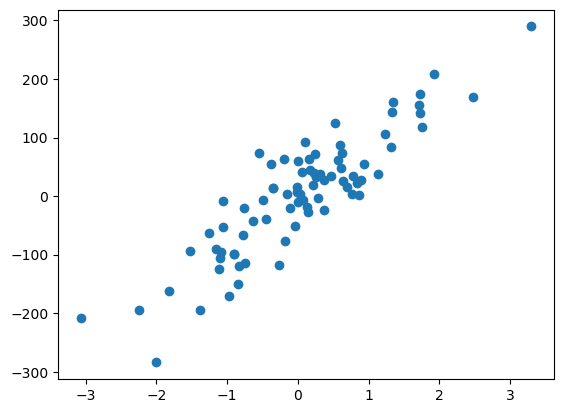

In [3]:
from sklearn.model_selection import train_test_split
#sklearn.model_selection.train_test_split(*arrays, test_size=None, 
#       train_size=None, random_state=None, shuffle=True, stratify=None)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 3)
plt.scatter(X_train,y_train)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [6]:
slope = reg.coef_
print(slope)
print(reg.intercept_)

[84.05045022]
-0.39870189024547065


In [7]:
# In this gradient decent reg class i fixed the slope from LinReg ->56.72465865
# What i will predict in this class is its intercept 
# Only made for single input

class My_GDReg:
    def __init__ (self):
        self.coef_ = 90.02411346
        self.intercept_ = None
        
    def fit(self, X_train, y_train, epochs, lr, b):
        for i in range(epochs):
            loss_slope = -2*np.sum(y_train -self.coef_*X_train.ravel() - b)
            b = b - lr*loss_slope
            print(loss_slope, b)
        self.intercept_ = b
        
        print(b)
        
    def predict(self, X_test):
        y_pred = self.coef_ * X_test + self.intercept_
        return y_pred


In [8]:
My_reg = My_GDReg()
My_reg.fit(X_train, y_train, epochs = 10, lr = 0.01, b = 5)

900.6268458762736 -4.006268458762737
-540.3761075257646 1.39749261649491
324.225664515459 -1.8447640286596805
-194.53539870927568 0.1005899584330765
116.7212392255658 -1.0666224338225816
-70.03274353533959 -0.3662949984691857
42.019646121203664 -0.7864914596812222
-25.211787672721925 -0.5343735829540031
15.127072603632882 -0.6856443089903319
-9.076243562179911 -0.5948818733685328
-0.5948818733685328


In [9]:
y_pred = My_reg.predict(X_test)


/var/folders/dg/cvz8h7590n1248mdbg0b0xxr0000gn/T/ipykernel_1813/2340954593.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


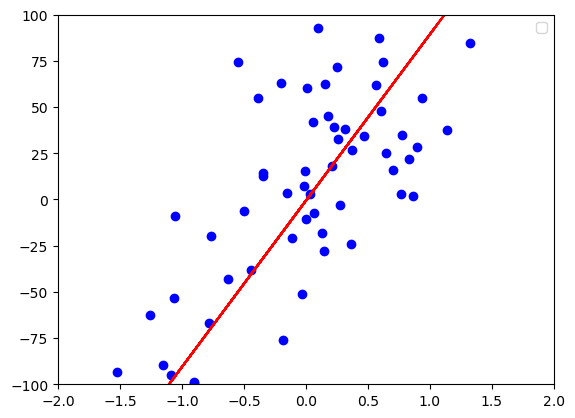

In [13]:
plt.scatter(X_train, y_train, color = 'blue', )
plt.plot(X_test, y_pred, color = 'red', )
plt.xlim(-2,2)
plt.ylim(-100,100)
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
print(mean_absolute_error(y_pred, y_test))
print(mean_squared_error(y_pred, y_test))
print(r2_score(y_pred, y_test))

33.14887742948121
1673.6040022871991
0.8163880937927521
